# <center> Programme (FSK/Manchester)

## I. Emission du message

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import sounddevice as sd
import soundfile as sf

### i. Entrée du message et conversion d'ASCII en binaire

In [34]:
# Entrée du message à envoyer
message_input = input(str("Entrez le message à transmetter :"))

# Conversion ASCII en binaire
def toBinary(message):
    l, m = [], []
    for i in message:
        l.append(ord(i))
    for j in l:
        m.append(str(bin(j)[2:]))
    return m

liste_message_bin = toBinary(message_input)

# Déclaration de la liste des données encodées par Manchester
message_input_bin = []

# Séparation des valeurs binaires et injection dans la liste
for i in range(0, len(liste_message_bin)):
    k = [int(char) for char in liste_message_bin[i].zfill(8)]
    message_input_bin.extend(k)

print("Le message est '", message_input, "'et en binaire cela donne :")
print(message_input_bin)
print("Sa taille est de", len(message_input_bin), "bits.")

Le message est ' Salut 'et en binaire cela donne :
[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
Sa taille est de 40 bits.


### ii. Création du CRC à partir des données

In [35]:
# # Déclaration de la fonction substraction_4bits qui a pour rôle de soustraire deux données binaires d'une taille de 4 bits
# def substraction_4bits(bit1, bit2):
#     bit_1_int = bin4ToInt(bit1)
#     bit_2_int = bin4ToInt(bit2)
#     bit_1_2_int = bit_1_int - bit_2_int
#     bit_1_2_str,bit_1_2_bin = [],[]
#     bit_1_2_bin = []
#     bit_1_2_str.append(str(bin(bit_1_2_int)[2:].zfill(4)))
#     for i in range(0,len(bit_1_2_str)):
#         k = [int(char) for char in bit_1_2_str[i]]
#         bit_1_2_bin.extend(k)
#     return bit_1_2_bin    

# # Déclaration de la fonction bin4ToInt ayant pour rôle de transformer une donnée binaire de 4 bits en une donnée décimale 
# def bin4ToInt(bit):
#     intBin = bit[0]*(2**3)+bit[1]*(2**2)+bit[2]*(2**1)+bit[3]*(2**0)
#     return intBin

# # Déclaration de la fonction division_eucli ayant pour rôle de réaliser le division euclidienne de deux données binaires de
# # 4 bits.
# def division_eucli(diviseur, divisé):
#     i = 0
#     j = i+4
#     sous_4bits = diviseur[i:j]
#     diviseur_reste = substraction_4bits(sous_4bits,poly_G)
#     print("La soustraction de",sous_4bits,"par",poly_G,"est égale à :",diviseur_reste)
#     for k in range(0,len(diviseur)-4):
#         while True :
#             if diviseur_reste[i] == 0:
#                 diviseur_reste.pop(i)
#                 diviseur_reste.append(diviseur[j+1])
#             else:
#                 break
        
#     return diviseur_reste
        
# poly_G = [1,0,0,1]
# message_copie_bin = message_input_bin

# if message_copie_bin[0] == 0:
#     message_copie_bin.pop(0)
    
# print(division_eucli(message_copie_bin,poly_G))

### iii. Insertion des données dans la trame

In [36]:
# Déclaration de la liste correspondant à la trame
trame_structure = []

# Initialisation des listes correspondant aux éléments de la trame
fanion = [0,1,1,1,1,1,1,0]
adresse_D = [1,1,1,1,1,1,1,1]
control = [0,0,0,0,0,0,1,1]
protocol = [0,0,0,0,0,0,0,0]
CRC = []                            # Non fonctionnel mais pas indispensable pour l'envoie du message

# Injection dans l'ordre des élements de la trame avant les données dans la trame
trame_structure.extend(fanion)
trame_structure.extend(adresse_D)
trame_structure.extend(control)
trame_structure.extend(protocol)

# affichage de la taille des élements avant données
print("La taille de la trame avant données est de ",len(trame_structure),"bits.")

# Injection des donées dans la trame
print(message_input_bin)
trame_structure.extend(message_input_bin)

# affichage de la taille des élements avant données + données
print("La taille de la trame avant données + données est de ",len(trame_structure),"bits.")

# Injection dans l'ordre des élements de la trame après les données dans la trame
#trame_structure.extend(CRC) Non ajouté car le programme pour créer le CRC n'est pas fonctionnelle
trame_structure.extend(fanion)

# affichage de la taille de la trame entière
print("La taille de la trame est de ",len(trame_structure),"bits.")

# Affichache de la trame
print("La trame finale à encoder est donc :",trame_structure)

La taille de la trame avant données est de  32 bits.
[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
La taille de la trame avant données + données est de  72 bits.
La taille de la trame est de  80 bits.
La trame finale à encoder est donc : [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]


### iv. Encodage Manchester du message

In [37]:
# Déclaration de la liste des données encodées par Manchester
message_input_encode = []

# Encodage des valeurs binaires et injection dans la liste
for i in range(0, len(trame_structure)):
    if trame_structure[i] == 1:
        message_input_encode.extend([-1, 1])
    elif trame_structure[i] == 0:
        message_input_encode.extend([1, -1])

print("Le message '", message_input, "'encodé Manchester donne :")
print(message_input_encode)
print("Sa taille est de ",len(message_input_encode),"bits.")

Le message ' Salut 'encodé Manchester donne :
[1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1]
Sa taille est de  160 bits.


### v. Modulation FSK

In [38]:
# Génération des 2 porteuse P1 pour le bit 1 et P2 pour le bit 0
A1 = 1                                 # Amplitude de la porteuse 1 du bit 1                           
A2 = 1                                 # Amplitude de la porteuse 2 du bit 0
fp1 = 18000                             # fréquence de la porteuse du bit 1
fp2 = 21000                             # fréquence de la porteuse porteuse du bit 0
Fe = 44100                             # Fréquence d'échantillonnage

baud = int(60)                         # Débit souhaité sur le canal de transmission exprimé en bit/s
Nbits = int(len(message_input_encode)) # Nombre de bits initial (taille du message M)
Ns = int(Fe/baud)                      # Nombre de symboles par bit (Fréq d'echan / Débit binaire) 
N = int(Nbits*Ns)                      # Nombre de bits total à moduler (Nombre de symboles par bit * Nombre de bits

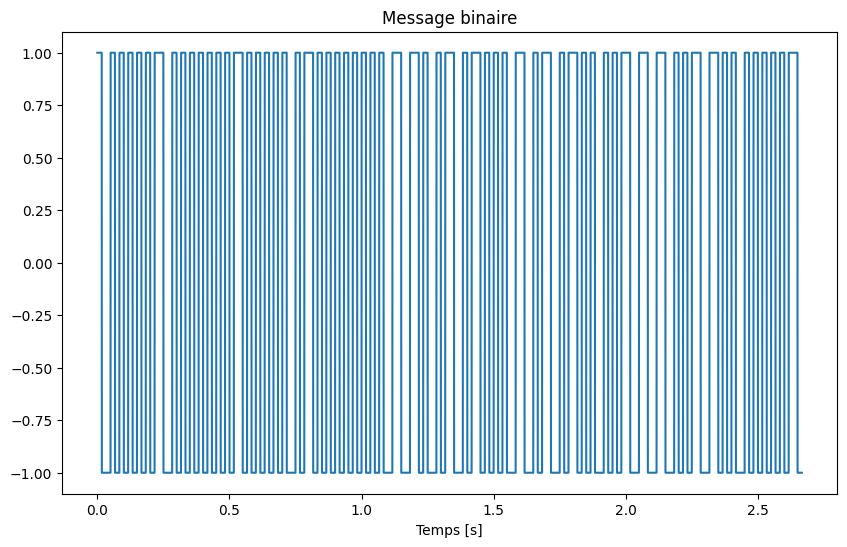

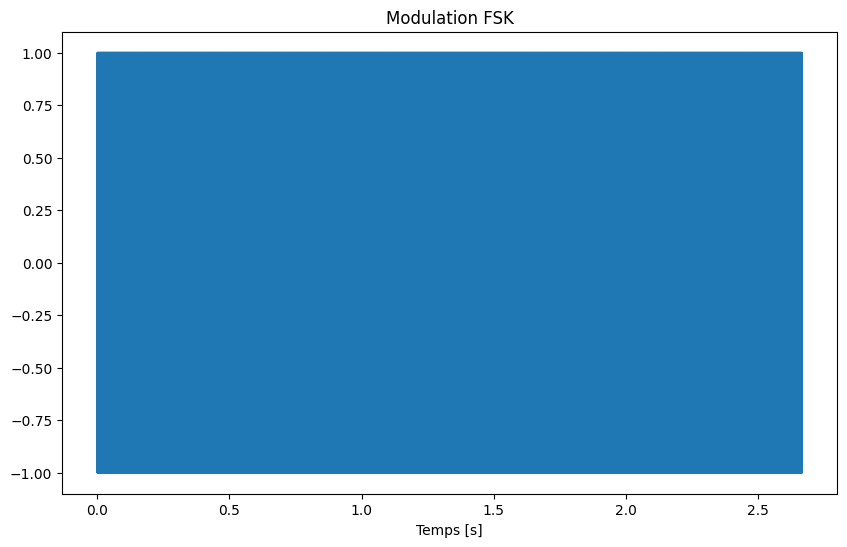

In [39]:
# On génère le message binaire dupliqué
message_encode_duplique = np.repeat(message_input_encode, Ns)     # On peut aussi le faire avec la focntion tile de numpy : binaire = np.tile(bits,(1,Ns))

# On génère le vecteur temps t1
t1= np.linspace (0.0,Ns/Fe,Ns)   

# On génère le vecteur temps t
t= np.linspace (0.0,N/Fe,N)      

P1 = A1*np.sin(2*np.pi*fp1*t1)       # porteuse du bit  1  
P2 = A2*np.sin(2*np.pi*fp2*t1)       # Porteuse du bits 0

# On réalise la modulation FSK
FSK = []

for n in range(0,len(message_input_encode)):
    if (message_input_encode[n] == 1):
        FSK.extend(P1)
    if (message_input_encode[n] == -1):
        FSK.extend(P2)
    
# Affichage du Message binaire, la porteuse et le résultat de la modulation ASK
plt.figure (figsize = (10,6))
plt.plot(t,message_encode_duplique) 
plt.xlabel('Temps [s]')
plt.title('Message binaire')

plt.figure (figsize = (10,6))
plt.plot(t,FSK)
plt.xlabel('Temps [s]')
plt.title('Modulation FSK')

plt.show()

### vi. Enregistrement et simulation du signal sonore

In [40]:
sd.play(FSK)
sd.wait()

sf.write("modulation_FSK.wav", FSK, 44100)

## II. Réception du signal

### i. Ouverture du fichier

La modulation a une durée de : 2.6666666666666665 secondes


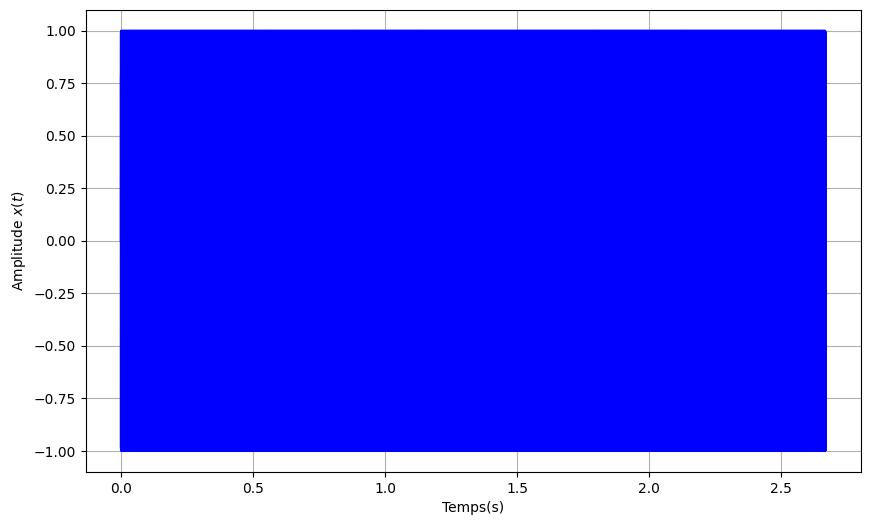

In [41]:
# Initialisation du nom du fichier son
filename = 'modulation_FSK.wav'

# Lecture du fichier son
data, Fe = sf.read(filename)

# Calcul de la durée du son 
Duree_son = len(data)/Fe
print('La modulation a une durée de :', Duree_son, 'secondes')

# Génération du vecteur temps
t_son = np.arange(0.0,N/Fe,1/Fe)             # Vecteur temps

# Tracer les données
plt.figure(figsize=(10,6))  # Créer une figure de taille 10cm x 6cm
plt.plot(t_son, data[:],'b')
plt.grid()
plt.xlabel("Temps(s)")
plt.ylabel("Amplitude $x(t)$")
plt.show()

### ii. Démodulation d'amplitude (ASK)

In [42]:
baud = int(60)                      # Débit souhaité sur le canal de transmission exprimé en bit/s
Nbits = int(len(data))              # Nombre de bits initial (taille du message M)
Ns = int(Fe/baud)                   # Nombre de symboles par bit (Fréq d'echan / Débit binaire) 
N= len(data)

fp1= 18000
fp2 = 21000
D = N/Fe

In [43]:
S1 = A1*np.sin(2*np.pi*fp1*t_son)          # Porteuse du bit  1  
S2 = A2*np.sin(2*np.pi*fp2*t_son)          # Porteuse du bits 0 

bit1= data*S1                           # Multiplier le signal modulé par la signal de la porteuse S1 (bit 1)
bit0= data*S2                           # Multiplier le signal modulé par la signal de la porteuse S2 (bit 0)

# Intégration des 2 résultats bit1 et bit0 sur période de T =[0, Ns], Ns: taille du symbole envoyé 
# par la méthode des Trapèzes (fonction numpy.trapz en Python) (l'approche la plus simple).

y1= []                                 # Résulat de l'intégration du bit1                            
y2= []                                 # Résulat de l'intégration du bit0  (ou bit-1 si NRZ)
i=0
for i in range(0,N,Ns):
    y1.append (np.trapz(bit1[i:i+Ns],t_son[i:i+Ns]))
    y2.append(np.trapz(bit0[i:i+Ns],t_son[i:i+Ns]))
    
print("Voici les données que l'on reçoit du fichier son ouvert:\n",y1,"\n et sa taille",len(y1),"en bits.\n")
print("Voici les données que l'on reçoit du fichier son ouvert:\n",y2,"\n et sa taille",len(y2),"en bits.")

Voici les données que l'on reçoit du fichier son ouvert:
 [0.0017654841840033212, 5.926468247274095e-06, 5.9264682472744e-06, 0.001765484184004146, 5.926468247267055e-06, 0.0017654841840042351, 5.926468247252967e-06, 0.0017654841840049253, 5.9264682470526605e-06, 0.0017654841840069662, 5.926468247334736e-06, 0.001765484184008548, 5.926468247305212e-06, 0.0017654841840093825, 0.001765484184007746, 5.9264682469034675e-06, 5.926468247520399e-06, 0.0017654841840081784, 5.926468247163554e-06, 0.001765484184008722, 5.926468247202511e-06, 0.0017654841840107453, 5.92646824752853e-06, 0.0017654841840126837, 5.926468247680197e-06, 0.0017654841840136722, 5.926468247285534e-06, 0.0017654841840131813, 5.926468247052071e-06, 0.0017654841840124271, 5.926468245866638e-06, 0.001765484184012979, 0.0017654841840159174, 5.926468247637513e-06, 0.001765484184014686, 5.926468247039311e-06, 0.00176548418401464, 5.926468246090736e-06, 0.0017654841840161343, 5.926468246128737e-06, 0.0017654841840174947, 5.92646

### iii. Comparateur et décodage du signal binaire

In [44]:
# si y1> y2 donc on a reçu un 1 (True) sinon un 0 (False)
comparateur= (np.array(y1) > np.array(y2))

# liste pour stocker le message démodulé
message_demodule_FSK= []

for ii in range (0,len(comparateur)):
    if comparateur [ii] == False:
        message_demodule_FSK.extend([int(-1)]) 
    if comparateur [ii] == True:
         message_demodule_FSK.extend([int(1)]) 
        
print("Voici alors le message décodé :",message_demodule_FSK,"avec une taile de",len(message_demodule_FSK),"bits.")

Voici alors le message décodé : [1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1] avec une taile de 160 bits.


### iv. Décodage Manchester du message reçu (Manchester vers binaire)

In [45]:
# conversion binaire en string (char)
# On remet le message en suite 0 et 1 
message_recu_bin = []

for i in range(0,len(message_demodule_FSK),2):
    if (message_demodule_FSK[i]==1 and message_demodule_FSK[i+1]==-1):
        message_recu_bin.append(int(0))
    elif (message_demodule_FSK[i]==-1 and message_demodule_FSK[i+1]==1):
        message_recu_bin.append(int(1))

print(message_recu_bin)
print(len(message_recu_bin))

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
80


### v. Conversion binaire vers ASCII

In [46]:
donnees = message_recu_bin[32:(len(message_recu_bin)-8)]
print(donnees)
# Ecrire la suite binaire du message dans une chaine de caractères (char) (résultat sous la forme par exmeple '001010111'
bin_data = ""
for elem in donnees:  
    bin_data += str(elem)

# initialisation d'une chaîne vide pour stocker les données reçues
data_reçu =' '

# Fonction BinarytoDecimal() function (conversion bianire ==> décimal)
def BinaryToDecimal(binary):  
    binary1 = binary 
    decimal, i, n = 0, 0, 0 #initialisation des variables
    
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal)

# Découper les données binaire d'entrée et la convertir en décimal puis la convertir en chaîne par bloc de 8 
for i in range(0, len(bin_data), 8): 
    # découper le bin_data de la plage d'index [0, 7] (car une caractère ASCII est codé sur 7 bits) ett le stocker sous forme d'entier dans temp_data
    temp_data = int(bin_data[i+1:i+8])
    # Passer (temp_data) dans la fonction BinarytoDecimal ()
    # pour obtenir la valeur décimale correspondante de (temp_data)
    decimal_data = BinaryToDecimal(temp_data)
    # Décodage de la valeur décimale renvoyée par la Fonction BinarytoDecimal (), en utilisant chr ()
    #fonction qui renvoie la chaîne correspondante caractère pour une valeur ASCII donnée et enregistrez-le dans data_recu
    data_reçu = data_reçu + chr(decimal_data) 

# Affichage du result 
print("Le message reçu est :", data_reçu) 

[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
Le message reçu est :  Salut
